<a href="https://colab.research.google.com/github/ShresthaPriya/AI-and-ML/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow


In [2]:
import numpy as np
from PIL import Image
import tensorflow as tf

# Task 1: Data Preparation

Training set: (17030, 28, 28, 1), Labels: (17030, 10)
Testing set: (3020, 28, 28, 1), Labels: (3020, 10)


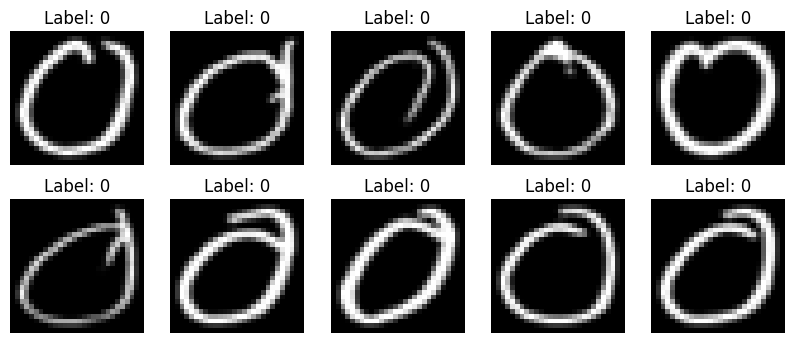

In [3]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow

# Load training and test datasets
train_dir = "/content/drive/MyDrive/AI ML/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/AI ML/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]

        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28,28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()  # Show all images after the loop


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize the images to values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0
# Flatten the 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
# One-hot encode the labels (0-9) for classification
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Task 2: Build the FCN Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow import keras

# Define the model with an explicit Input layer
model = Sequential([
    keras.layers.Dense(64, input_shape=(784,), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')  # Output layer
])

# Print model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

In [10]:
# Compile the model
model.compile(
    optimizer='adam',  # Optimizer
    loss='categorical_crossentropy',  # Loss function (use sparse_categorical_crossentropy if labels are integers)
    metrics=['accuracy']  # Evaluation metric
)


# Task 4: Train the Model

In [11]:
from tensorflow import keras  #

batch_size = 128
epochs = 20
# Callbacks
callbacks = [
  keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
  keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
  x_train,
  y_train,
  batch_size=batch_size,
  epochs=epochs,
  validation_split=0.15,
  callbacks=callbacks,
)



Epoch 1/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7927 - loss: 0.6827 - val_accuracy: 0.9557 - val_loss: 0.1514
Epoch 2/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9543 - loss: 0.1531 - val_accuracy: 0.9654 - val_loss: 0.1153
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9687 - loss: 0.1033 - val_accuracy: 0.9637 - val_loss: 0.1101
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9731 - loss: 0.0859 - val_accuracy: 0.9690 - val_loss: 0.1084
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9789 - loss: 0.0661 - val_accuracy: 0.9741 - val_loss: 0.0878
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9858 - loss: 0.0468 - val_accuracy: 0.9712 - val_loss: 0.1032
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9729 - val_loss: 0.1010
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9875 - loss: 0.0384 - val_accuracy: 0.

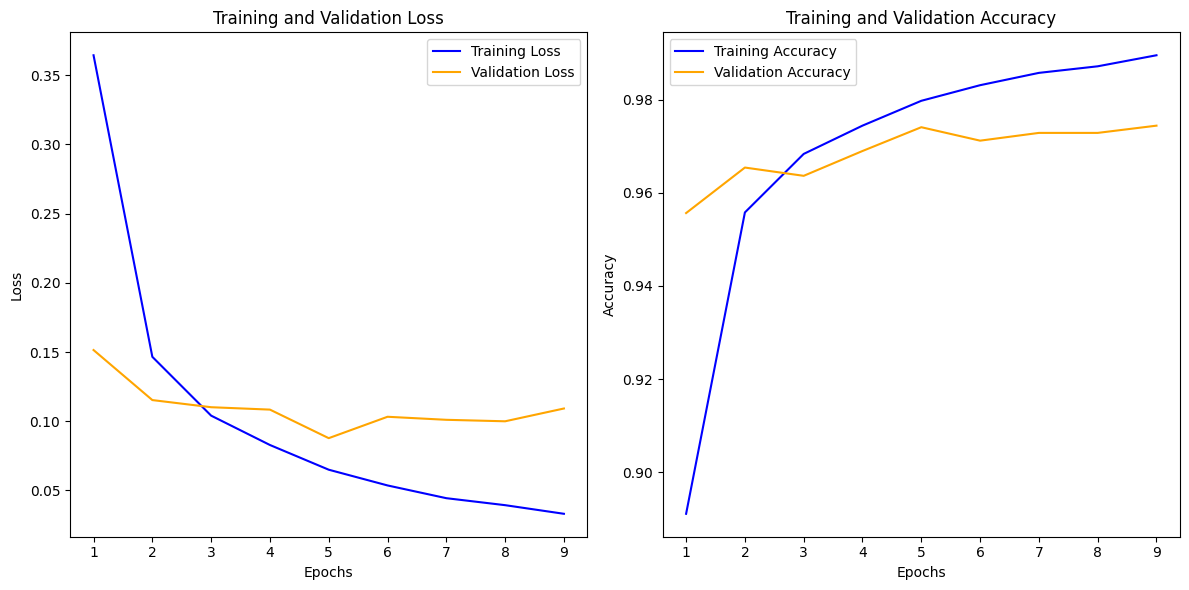

In [12]:
import matplotlib.pyplot as plt
# Assuming ’history’ is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()

# Task 5: Evaluate the Model


In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9699 - loss: 0.1050
Test accuracy: 0.9699


# Task 6: Save and Load the Model

In [23]:
model.save('mnist_fully_connected_model.h5')

In [17]:
loaded_model = tf.keras.models.load_model('mnist_fully_connected_model.h5')

In [20]:
# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test, verbose=1)

print(f"Test Accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.1160
Test Accuracy: 0.9699


# Task 7: Predictions


In [18]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 7
True label for first image: 7


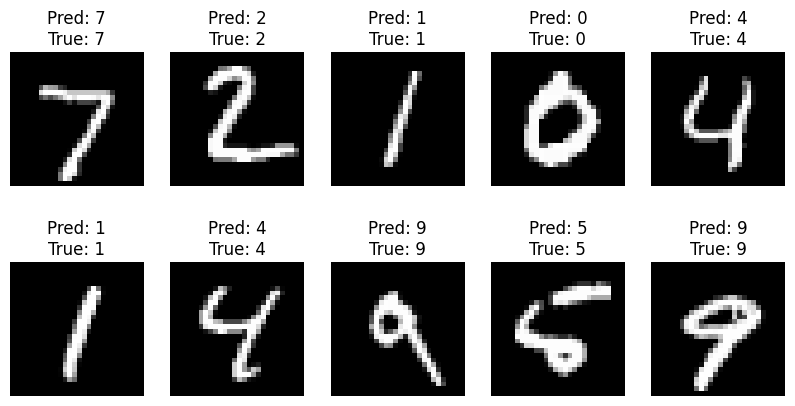

In [22]:
import matplotlib.pyplot as plt

# Display first 10 test images and their predictions
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")  # Reshape if needed
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {np.argmax(y_test[i])}")
    plt.axis("off")

plt.show()

In [24]:
import os

# List files in the current directory
print(os.listdir())


['.config', 'model_at_epoch_7.keras', 'mnist_fully_connected_model.h5', 'model_at_epoch_4.keras', 'model_at_epoch_8.keras', 'drive', 'model_at_epoch_1.keras', 'model_at_epoch_5.keras', 'model_at_epoch_6.keras', 'model_at_epoch_3.keras', 'model_at_epoch_2.keras', 'model_at_epoch_9.keras', 'sample_data']


In [25]:
import shutil

# Move the model to a new directory
shutil.move("mnist_fully_connected_model.h5", "/content/drive/MyDrive/AI ML/DevanagariHandwrittenDigitDataset/mnist_fully_connected_model.h5")


'/content/drive/MyDrive/AI ML/DevanagariHandwrittenDigitDataset/mnist_fully_connected_model.h5'